Test-set R^2: 0.94


Text(0,0.5,'Rentals')

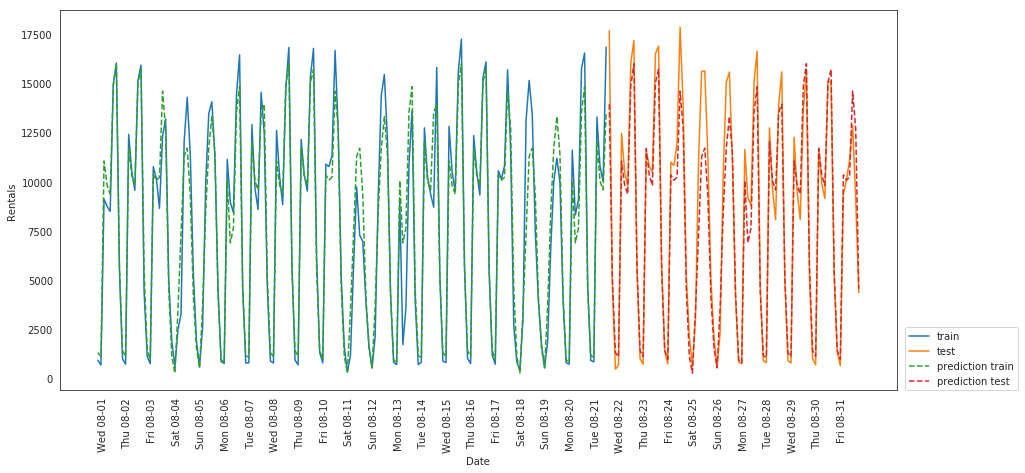

In [19]:
"""This notebook is focused on predicting the behaviour of bike rentals in NYC. 
   Ridge classifier is used to predict the number of rentals for the followig week with
   the accuracy of 0.94. 
   The notebook is heavily based on a study book example."""

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("white")
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

#load data from the official citibike site
#now is set randomly on August 2018, can be changed
url = "https://s3.amazonaws.com/tripdata/201808-citibike-tripdata.csv.zip"
full_data = pd.read_csv(url, parse_dates=True)
index = pd.to_datetime(full_data.starttime)

#prepare data for analysis with 3 hour intervals and time-data as index
data = pd.Series(1, index=index).resample('3H').sum()

#prepare data for model in X and y form
hour = data.index.hour
hour = hour[:, np.newaxis]
day = data.index.dayofweek
day = day[:, np.newaxis]

# X shape is (248, 2)
X = np.hstack([hour, day])

# transfer categorical data (0, 3, .. 24 hours and 1, 2, ..7 day) to vectors
enc = OneHotEncoder()
X = enc.fit_transform(X).toarray()

# add polynimial features
poly = PolynomialFeatures()
X = poly.fit_transform(X)

# y shape is (248,)
y = data.values

#break data into train and test sets
n_test = y.shape[0] // 3
n_train = y.shape[0] - n_test
X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

#use Ridge classifier to predict target values 
clf = Ridge()
clf.fit(X_train, y_train)
print("Test-set R^2: {:.2f}".format(clf.score(X_test, y_test)))

#predict target values
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

#plot the data
plt.figure(figsize=(15, 7))
xticks = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')
plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(range(n_train), y_train, label="train")
plt.plot(range(n_train, n_test+n_train), y_test, '-', label="test")
plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
plt.plot(range(n_train, n_test+n_train), y_pred, '--', label="prediction test")
plt.legend(loc=(1.01, 0))
plt.xlabel("Date")
plt.ylabel("Rentals")